# Support Vector Machines (SVMs)

In [101]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Heart Dataset 

In this project we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [102]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type
* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**RestECG**: resting electrocardiographic results
* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**MaxHR:** The person’s maximum heart rate achieved

**ExAng:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)

**Slope:** the slope of the peak exercise ST segment
* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia 
* Value 0: NULL (dropped from the dataset previously
* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = yes; 0 = no)
- **Note**: For Q1, Q4, and Q5. your labels can be arbitrary. But, for Q3, you will need to ensure that "Yes" = 1 and "No" = -1, as an SVM predicts 1 and -1, not 1 and 0.

# Q1 

**Implement SVM using libraries**: We want to use a **support vector machine** to predict if each patient will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease, it is labeled "Yes", otherwise it is labeled "No".

Please prepare your dataset for predicting heart disease ("Target" column) by using 3 features:

- Age of the patient (Column **"Age"**)
- Gender of the patient (male or female - Column **"Sex"**)
- Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data.

Finally, implement a Support Vector Machine using Scikit-Learn and train it on your training set.





<!-- BEGIN QUESTION -->



In [103]:
# Put the features into an "X" array, and target variable into a "y" array.
X = heart_df[["Age", "Sex", "Chol"]].to_numpy()
y = heart_df["Target"].to_numpy()
#print(y)

In [104]:
# Split your "X" and "y" arrays into training and testing sets. 
# You may use scikit-learn to do this.
from sklearn.model_selection import train_test_split
#X_train = ...
#X_test = ...
#y_train = ...
#y_test = ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train)

[[ 57   0 303]
 [ 58   0 319]
 [ 54   1 206]
 [ 56   1 221]
 [ 48   1 245]
 [ 65   1 282]
 [ 50   0 254]
 [ 45   0 236]
 [ 60   1 206]
 [ 64   1 212]
 [ 57   1 274]
 [ 54   1 309]
 [ 41   0 268]
 [ 46   0 177]
 [ 53   1 246]
 [ 43   1 177]
 [ 45   1 308]
 [ 58   0 283]
 [ 66   1 246]
 [ 77   1 304]
 [ 62   0 263]
 [ 56   1 236]
 [ 71   0 149]
 [ 39   1 321]
 [ 57   1 335]
 [ 60   0 240]
 [ 57   0 354]
 [ 54   0 214]
 [ 44   1 226]
 [ 55   0 327]
 [ 70   1 269]
 [ 29   1 204]
 [ 70   1 174]
 [ 58   0 225]
 [ 52   1 223]
 [ 42   0 265]
 [ 50   1 196]
 [ 54   1 283]
 [ 55   0 342]
 [ 52   1 212]
 [ 57   1 276]
 [ 44   1 233]
 [ 54   1 266]
 [ 62   0 164]
 [ 58   1 224]
 [ 62   0 394]
 [ 42   1 295]
 [ 62   1 281]
 [ 45   0 234]
 [ 57   1 192]
 [ 46   1 311]
 [ 43   1 247]
 [ 58   1 270]
 [ 46   1 197]
 [ 46   1 249]
 [ 59   1 234]
 [ 41   1 250]
 [ 60   1 185]
 [ 58   1 220]
 [ 42   1 315]
 [ 44   1 220]
 [ 52   1 186]
 [ 46   1 231]
 [ 41   0 204]
 [ 45   1 260]
 [ 54   1 239]
 [ 54   0 

In [105]:
# Create an SVM using SciKit-Learn, and train it on your training set.
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

<!-- END QUESTION -->

# Q2

Calculate the accuracy, Precision, recall and F1 score of your **SVM** implementaion from Task 1 on the testing dataset. 
Print the results. You may use library methods for this task if you choose to.


<!-- BEGIN QUESTION -->



In [106]:
from sklearn.metrics import classification_report
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.52      0.67      0.59        33
         Yes       0.42      0.29      0.34        28

    accuracy                           0.49        61
   macro avg       0.47      0.48      0.46        61
weighted avg       0.48      0.49      0.47        61



<!-- END QUESTION -->

# Q3 

**Implement SVM without using libraries**: Implement a SVM from scratch using the hinge loss 
function and gradient descent. Try to replicate the same results as you got from the scikit-learn
SVM. Report the accuracy, precision, recall, and F1-score of your model.

- You can re-use your training/testing set from Q1, but you may need to rename your target variable (e.g. "No", "Yes") to a number. If so,
  assign 1 to "Yes"es and -1 to "No"s. (**Note: setting "No"s to -1 is very important here!**)
- Do as many iterations as needed, with a maximum of **100 iterations**.
- Use a very small learning rate for checking your GD implementation. 
- You are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
- Visualize your costs with a plot. 
- No need to add an y-intercept in this task.
- You can use libraries to report the accuracy, precision, recall and F1-score. 


**Hint**: Here are the formulae for hinge loss and its gradient:

Hinge loss function (with regularization):
$$ 
cost = \frac{ \lambda }{ 2 } ||w||^2 + \frac{1}{N} \sum_i^n max(0, 1 - y_i (w \cdot x_i))
$$
- $x_i$: Training sample $x_i$
- $y_i$: Training label $y_i$
- $w$: SVM weights
- $N$: Number of elements
- $\lambda$: Regularization parameter, $= \frac{1}{N \times c}$

Gradient of hinge loss:

$$gradient(w)=\frac{1}{N}\sum_i^n
\begin{cases}
w &  \text{ if } max(0, y_i (w \cdot x_i)) = 0 \\
w - c y_i x_i &  \text{otherwise}
\end{cases}
$$



<!-- BEGIN QUESTION -->



In [107]:
# Implement hinge cost and its gradient function.
def hinge_loss(X, y, W, c):
    """Calculate the hinge loss function, with regularization.
    
    Parameters:
        X: Training set samples
        y: Training set labels
        W: Current weights of the SVM.
        c: The term c in the formula above (used to define lambda)

    Returns:
        hinge_loss: The hinge loss.
    """
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0 
    
    hinge_loss = c * (np.sum(distances) / n)
    return hinge_loss

def hinge_loss_gradient(X, y, W, c):
    """Calculate the gradient of the hinge loss function.
    
    Parameters:
        X: Training set samples
        y: Training set labels
        W: Current weights of the SVM.
        c: The term c in the formula above (used to define lambda)

    Returns:
        dW: The gradient of the hinge loss with respect to each feature.
    """
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
        
    distance = 1 - (y * np.dot(X, W))
    
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        
        if (d < 0):
            di = W
        else:
            di = W - (c * y[ind] * X[ind])
            
            
        dw += di
    
    dw = dw/len(y)  # average
    return dw

def predict_svm(X, W):
    """Predict the label for a set of samples, given an SVM
    with weights W. 
    
    (Hint: You won't need this for your gradient descent, just your
     final metrics collection)
     
    Parameters:
        X: Training set samples
        W: Current weights of the SVM.
        
    Returns:
        y_pred: Predicted classification of the samples.
    """
    y_pred = np.where(np.dot(X,W) < 0,-1,1)
    return y_pred

In [108]:
# Implement an iterative SVM trained via gradient descent. 
# Make sure your y-labels are in the right format (-1 for "No", 1 for "Yes")
y_train[y_train == "Yes"] = 1
y_train[y_train == "No"] = -1

weights = np.zeros(3)
num_iterations = 100
lr = 0.001
c = 0.01
cost_list = []

# Implement gradient descent here.
for i in range(0,num_iterations):
    cost = hinge_loss(X_train,y_train,weights,c)
    print("Iteration", i , "Cost is:", cost, "weights", weights)
    cost_list.append(cost)
    grad = hinge_loss_gradient(X_train, y_train, weights, c)
    weights = weights - lr * grad

Iteration 0 Cost is: 0.01 weights [0. 0. 0.]
Iteration 1 Cost is: 0.00997893968308176 weights [-2.18181818e-05  5.78512397e-07 -1.43471074e-04]
Iteration 2 Cost is: 0.009957900426480433 weights [-4.36145455e-05  1.15644628e-06 -2.86798678e-04]
Iteration 3 Cost is: 0.009936882209135706 weights [-6.53891127e-05  1.73380223e-06 -4.29982953e-04]
Iteration 4 Cost is: 0.009915885010008325 weights [-8.71419054e-05  2.31058083e-06 -5.73024045e-04]
Iteration 5 Cost is: 0.009894908808080072 weights [-1.08872945e-04  2.88678264e-06 -7.15922095e-04]
Iteration 6 Cost is: 0.009873953582353755 weights [-1.30582254e-04  3.46240826e-06 -8.58677247e-04]
Iteration 7 Cost is: 0.009853019311853157 weights [-1.52269854e-04  4.03745824e-06 -1.00128964e-03]
Iteration 8 Cost is: 0.00983210597562306 weights [-1.73935766e-04  4.61193318e-06 -1.14375943e-03]
Iteration 9 Cost is: 0.009811213552729193 weights [-1.95580012e-04  5.18583365e-06 -1.28608674e-03]
Iteration 10 Cost is: 0.00979034202225822 weights [-2.172

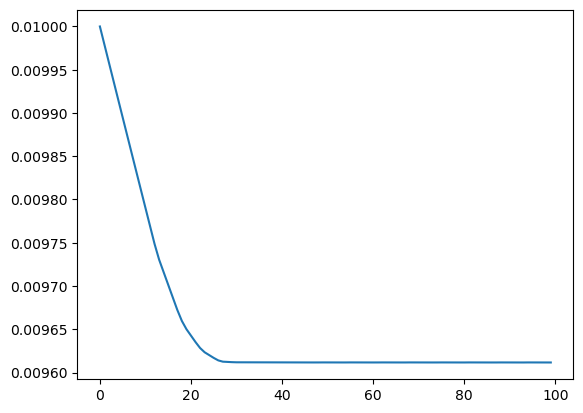

In [109]:
# Visualize your cost function over each iteration.
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [114]:
# Compute and print metrics for you SVM on the testing dataset.
from sklearn.metrics import accuracy_score
pred_y = predict_svm(X_test, weights)
y_test[y_test == 'Yes'] = 1
y_test[y_test == 'No'] = -1
y_test = y_test.astype(np.int32)
#print(type(pred_y[0]))
#print(type(y_test[0]))

print("Accuracy Score:", accuracy_score(y_test, pred_y))

print(classification_report(y_test,pred_y, zero_division=0))



#y_pred = svm_model.predict(X_test)
#y_pred[y_pred == "Yes"] = 1
#y_pred[y_pred == "No"] = -1
#y_pred = y_pred.astype(np.int32)
#print(y_pred)
#print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.5409836065573771
              precision    recall  f1-score   support

          -1       0.54      1.00      0.70        33
           1       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61



<!-- END QUESTION -->

# Q4

**Compare SVM results to logistic regression**: Implement a logistic regression to solve this task, using libraries. Compare the performance of the logistic regression model to your SVM models on the testing dataset. You can use metrics like accuracy, precision, recall, the F1-score, and any other metric you think may be useful for this comparison. Which one performs better?


According to the classification reports, the logistic regression has better percentages for precision, recall, f1-score and accuracy. For the target values of "No" (aka -1) is the same, but that is the only identical value for these reports. Across the board, the logistic regression is a better predictor for this data set. SVM could be better with added kernels to help fit the data.

<!-- BEGIN QUESTION -->



In [124]:
# Implement logistic regression.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression( fit_intercept=True)
y_train = y_train.astype(np.int64)


# Fit the model to your training data.
#print(type(X_train))
#print(type(y_train))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model.fit(X_train,y_train)

LogisticRegression()

In [129]:
# Analyze the performance of the logistic regression on the testing dataset.
y_predi = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predi)
print("Accuracy:", accuracy)

report = classification_report(y_test,y_predi)
print(report)

Accuracy: 0.6885245901639344
              precision    recall  f1-score   support

          -1       0.73      0.67      0.70        33
           1       0.65      0.71      0.68        28

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



<!-- END QUESTION -->

# Q5

**Apply a kernel function to your SVM**: Using the Scikit-learn library, revisit the SVM you implemented in Question 1 and experiment with different kernel functions. Can you improve its performance? Describe your results.


Using the same data as Q1, by using the default rbf kernel with the gamma parameter set to "auto" from the default "scale" it significantly imporves all percentages in the classification report. By using a larger coefficient for the kernel, it increased the percentages to be more accurate. Coincidentally, using the kernel="linear" parameter, it gave the same exact results as the logistic regression, implying that they function the same on this particular data set. This shows that these algorithms need to be parameterized to better fit the data rather than using default values.

<!-- BEGIN QUESTION -->



In [155]:
# Create an SVM using SciKit-Learn, and train it on your training set. Experiment with different kernel types.
svm_model2 = svm.SVC(kernel='rbf', gamma="auto")
svm_model2.fit(X_train, y_train)

SVC(gamma='auto')

In [156]:
# Analyze the performance of the SVM+kernel on the testing dataset.
y_predi2 = svm_model2.predict(X_test)
print(classification_report(y_test,y_predi2))

              precision    recall  f1-score   support

          -1       0.62      0.85      0.72        33
           1       0.69      0.39      0.50        28

    accuracy                           0.64        61
   macro avg       0.65      0.62      0.61        61
weighted avg       0.65      0.64      0.62        61



<!-- END QUESTION -->

